In [1]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv")
head(election)
tail(election)
str(election)
summary(election)

Warning message in file(file, "rt"):
"파일 '../Data/election_2022.csv'를 여는데 실패했습니다: No such file or directory"

ERROR: Error in file(file, "rt"): 커넥션을 열 수 없습니다


In [2]:
election$투표율 <- election$투표수 / election$선거인수 *100

head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율
서울특별시,종로구,129968,100629,46130,49172,3115,77.42598
서울특별시,중구,111448,84998,38244,42906,2310,76.26696
서울특별시,용산구,199077,152068,60063,85047,4374,76.38652
서울특별시,성동구,252087,197240,84411,103880,5365,78.24283
서울특별시,광진구,303582,235471,109922,113733,7072,77.56422
서울특별시,동대문구,300928,232106,108171,112890,6416,77.13008


In [3]:
library(plotrix)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



광역시도,투표수
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284


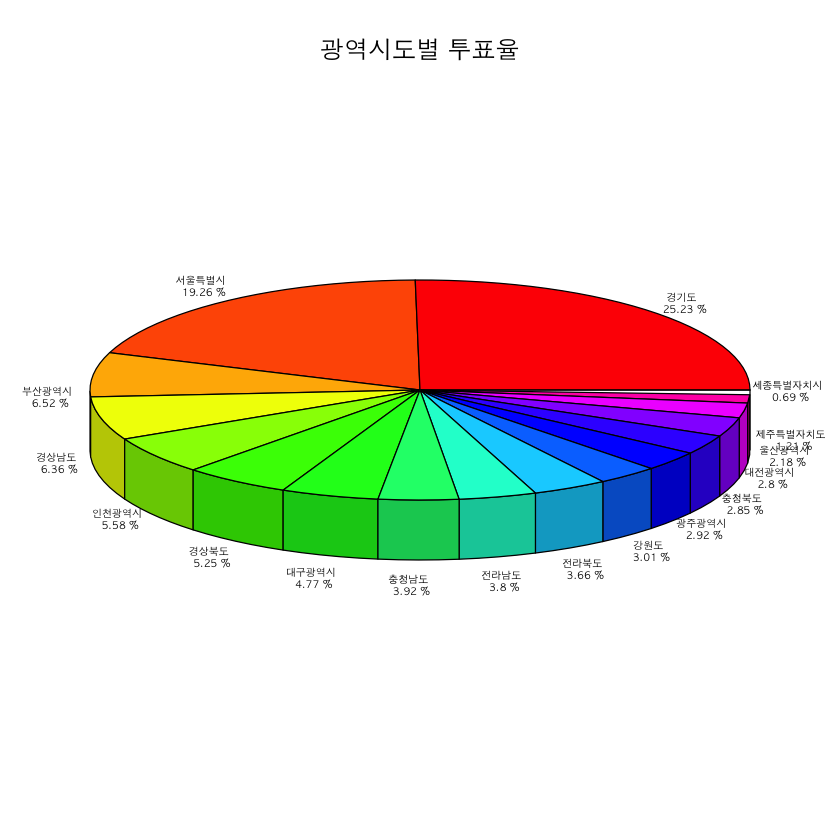

In [4]:

# 광역시도 별 투표수 합계
election2 <- aggregate(투표수 ~ 광역시도, election, sum)

election2 <- arrange(election2, desc(election2$투표수))

head(election2)

par(family = "AppleGothic")
options(warn = -1)

pie3D(
    election2$투표수,
    main = "광역시도별 투표율",
                                                # 전체 투표수 광역시도별 대비 투표율
    labels = paste(election2$광역시도, "\n", round(election2$투표수 / sum(election2$투표수) *100, 2), "%"),
    labelcex = 0.5,
    radius = 1.1 # 지름
)

In [5]:
# electionSum = 이재명 + 윤석열 + 심상정

election$electionSum <- apply(election[,5:7], 1, sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,77.42598,98417
서울특별시,중구,111448,84998,38244,42906,2310,76.26696,83460
서울특별시,용산구,199077,152068,60063,85047,4374,76.38652,149484
서울특별시,성동구,252087,197240,84411,103880,5365,78.24283,193656
서울특별시,광진구,303582,235471,109922,113733,7072,77.56422,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,77.13008,227477


In [6]:
# electionRatio <- 투표수 대비 electionSum의 퍼센트 구해서 넣기

election$electionRatio <- election$electionSum / election$투표수 * 100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,77.42598,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,76.26696,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,76.38652,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,78.24283,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,77.56422,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,77.13008,227477,98.00565


In [7]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기
library(dplyr)
arrange(election, desc(electionRatio))[1,]
arrange(election, desc(electionRatio))[nrow(election),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,82.92702,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,79.91854,14319,96.02334


In [8]:
# 2) subset()

subset(election, electionRatio == max(election$electionRatio))
subset(election, electionRatio == min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,82.92702,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,79.91854,14319,96.02334


In [9]:
# election_2022_job1.csv 로 저장하기

write.csv(election, "../Data/election_2022_job1.csv", row.names=F)

광역시도,이재명
경기도,4297931
서울특별시,2944981
전라남도,1094872
전라북도,1016863
인천광역시,913320
부산광역시,831896


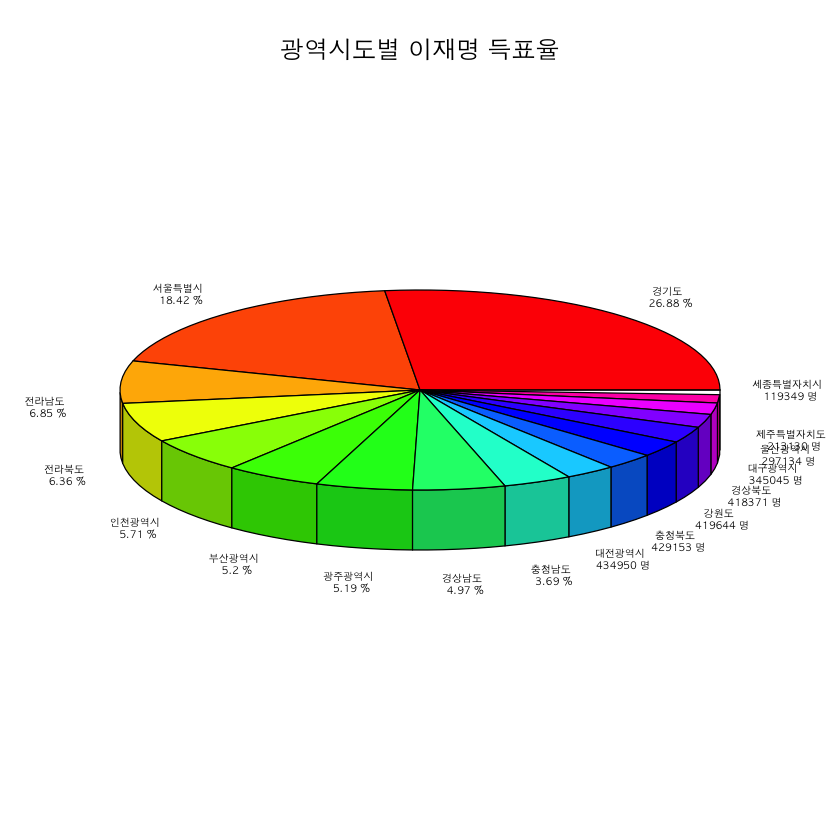

In [10]:
# 각 후보의 광역시도별 득표율을 3D Pie Chart로 표현하기
# (단, 득표율이 3%미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다.)
# 퍼센트 단위는 소수 한자리
# 이재명

library(dplyr)
unique(Female$Name
voteLee <- aggregate(이재명 ~ 광역시도, election, sum)
voteLee <- arrange(voteLee, desc(이재명))

ratioLee <- round(voteLee$이재명/sum(voteLee$이재명)*100, 2)

head(voteLee)

par(family = "AppleGothic")
pie3D(
    voteLee$이재명,
    main = "광역시도별 이재명 득표율",
    labels = ifelse(ratioLee >= 3, paste(voteLee$광역시도, "\n", ratioLee, "%"), paste(voteLee$광역시도, "\n", voteLee$이재명, "명")),
    labelcex = 0.5

)


In [11]:
# 수도권(경기도,서울,인천)의 투표인구수의 퍼센트?
sum(election2$투표수[c(1,2,5)]) / sum(election2$투표수) * 100
head(election)

[1] 50.06473

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,77.42598,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,76.26696,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,76.38652,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,78.24283,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,77.56422,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,77.13008,227477,98.00565


In [12]:
# 이재명의 수도권(경기도,서울,인천)의 투표인구수의 퍼센트?
sum(voteLee$이재명[c(1,2,5)]) / sum(voteLee$이재명) * 100

[1] 51.00572

In [13]:
# 윤석열 후보의 서울투표 Top5를 구하고 나머지 지역은 기타로 합치기

table(election$광역시도)



        강원도         경기도       경상남도       경상북도     광주광역시 
            18             41             22             24              5 
    대구광역시     대전광역시     부산광역시     서울특별시 세종특별자치시 
             8              5             16             25              1 
    울산광역시     인천광역시       전라남도       전라북도 제주특별자치도 
             5             10             22             15              2 
      충청남도       충청북도 
            16             13 

광역시도,시군구,윤석열
서울특별시,송파구,255166
서울특별시,강남구,235897
서울특별시,강서구,181510
서울특별시,서초구,179472
서울특별시,노원구,163340


광역시도,시군구,윤석열
서울특별시,기타,2240362


광역시도,시군구,윤석열
서울특별시,송파구,255166
서울특별시,강남구,235897
서울특별시,강서구,181510
서울특별시,서초구,179472
서울특별시,노원구,163340
서울특별시,기타,2240362


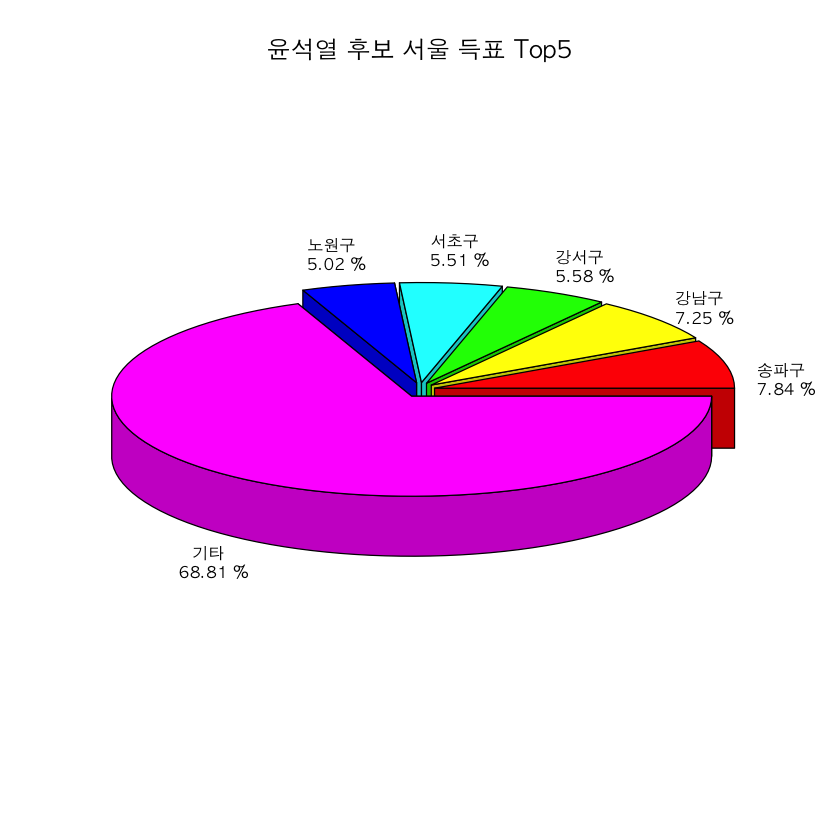

In [14]:
# 윤석열 후보의 서울투표 Top5를 구하고 나머지 지역은 기타로 합치기

# 서울 특별시 데이터만 발췌하기
seoulYun <- data.frame(광역시도=election[1:25,]$광역시도, 시군구=election[1:25,]$시군구, 윤석열=election[1:25,]$윤석열)
# seoulYun <- subset(election, 광역시도 == '서울특별시')
# seoulYun <- election[election$광역시도=="서울특별시", ]

seoulYun <- arrange(seoulYun, desc(윤석열))
# seoulYun

# top5
top5 <- seoulYun[1:5,]
top5

# top5아래 지역
underTop5 <- seoulYun[6:nrow(seoulYun),]
underTop5 <- aggregate(윤석열 ~ 광역시도, underTop5, sum)
underTop5 <- data.frame(광역시도=underTop5$광역시도, 시군구="기타", 윤석열=underTop5$윤석열)
underTop5

yun <- rbind(top5, underTop5)
yun
par(family = "AppleGothic")

pie3D(
    yun$윤석열,
    main = "윤석열 후보 서울 득표 Top5",
    labels = paste(yun$시군구, "\n", round(yun$윤석열/sum(yun$윤석열)*100, 2), "%"),
    labelcex = 0.8,
    explode = 0.05,
)

In [15]:
# 서울 특별시 데이터마 발췌

#subset(election,광역시도=='서울특별시')
#다른방법
election_Seoul <- election[election$광역시도=='서울특별시',]
election_seoul_윤석열 <- arrange(election_Seoul,desc(윤석열))[,c(2,6)]
head(election_seoul_윤석열)

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593


In [16]:
# ratio 구하기
election_seoul_윤석열_ratio <-
round(c(election_seoul_윤석열[1:5,2],sum(election_seoul_윤석열[-c(1:5),2]))/sum(election_seoul_윤석열$윤석열)*100,2)

election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [17]:
# label 만들기
election_Seoul_윤석열_label <- c(as.character(election_seoul_윤석열$시군구[1:5]),'기타')
election_Seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

# 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구
- 성북구의 후보별 득표율

,이재명,윤석열,심상정,other
8,142702,135044,8952,5489


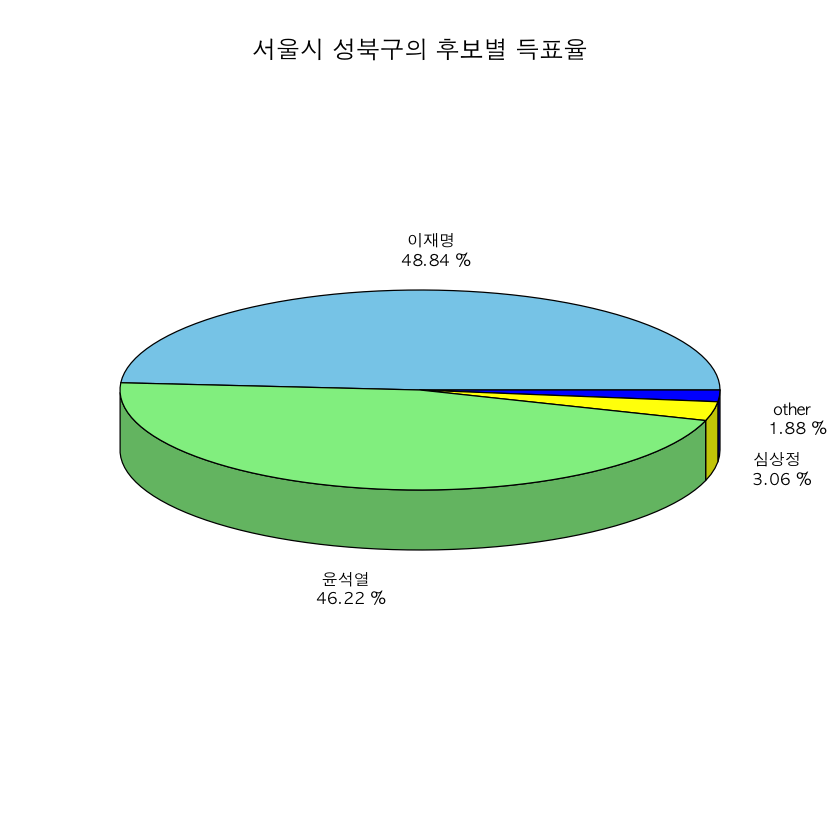

In [18]:
seongbuk <- election[election$시군구 == '성북구',]
seongbuk$other <- seongbuk[,4] - sum(seongbuk[,5:7])

seongbuk <- seongbuk[,c(5:7, ncol(seongbuk))]
seongbuk

par(family = "AppleGothic")
pie3D(
    t(seongbuk),
    main = "서울시 성북구의 후보별 득표율",
    labels = paste(colnames(seongbuk), "\n", round(t(seongbuk)/sum(t(seongbuk))*100, 2), "%" ),
    labelcex = 0.8,
    col = c('skyblue', 'lightgreen', 'yellow','blue')
)

In [19]:
# 대선주자 출생지별 득표율 분석 2
pob_윤석열 <- subset(election, 시군구 =="성북구")
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
8,서울특별시,성북구,375880,292187,142702,135044,8952,77.73412,286698,98.12141


In [20]:
yunn <- as.numeric(c(pob_윤석열[,5:7],pob_윤석열[,4]- sum(pob_윤석열[,5:7])))
yunn


[1] 142702 135044   8952   5489

---
# 투표수가 가장 많은 4지역(광역시도)의 후보별 득표수 차이 막대그래프로 시각화



In [22]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,77.42598,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,76.26696,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,76.38652,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,78.24283,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,77.56422,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,77.13008,227477,98.00565


광역시도,투표수
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882


,광역시도,이재명
1,경기도,4297931
2,서울특별시,2944981
6,부산광역시,831896
8,경상남도,794130


,광역시도,윤석열
1,경기도,3859666
2,서울특별시,3255747
4,부산광역시,1270072
5,경상남도,1237346


,광역시도,심상정
1,경기도,201113
2,서울특별시,180324
5,부산광역시,47541
7,충청남도,31789


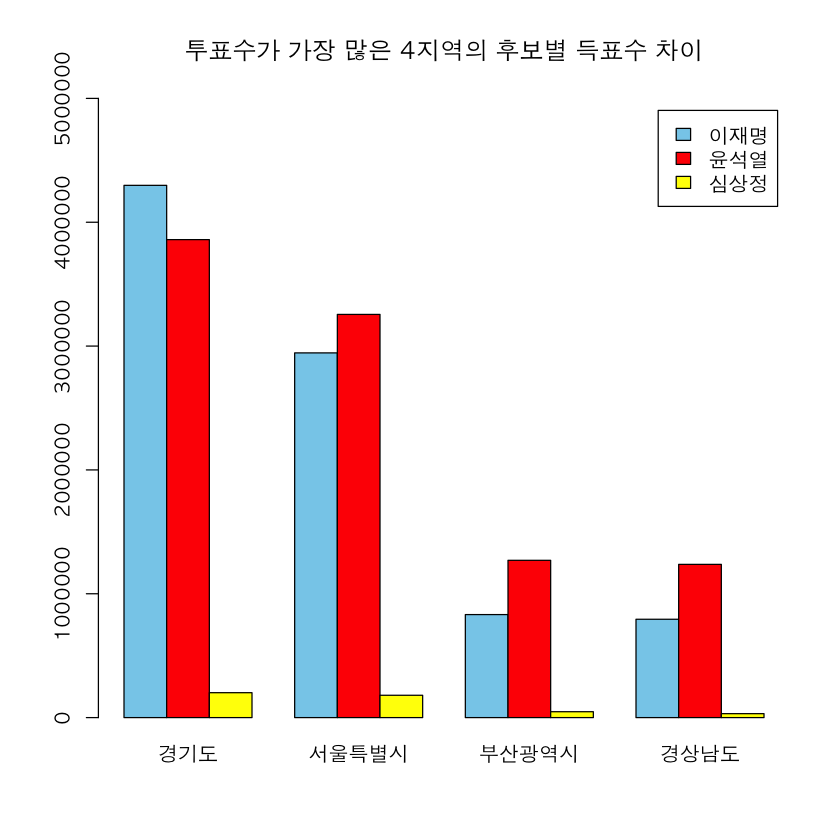

In [104]:
voteLot <- aggregate(투표수 ~ 광역시도, election, sum)
voteLot <- arrange(voteLot, desc(투표수))

# 가장 많은 투표수 광역시도 4개 확인
head(voteLot, 4)

# 이재명
ljm <- aggregate(이재명 ~ 광역시도, election, sum)
ljm <- arrange(ljm, desc(이재명))[c(1,2,6,8),]
ljm

# 윤석열
yunnn <- aggregate(윤석열 ~ 광역시도, election, sum)
yunnn <- arrange(yunnn, desc(윤석열))[c(1,2,4,5),]
yunnn

# 심상정
sim <- aggregate(심상정 ~ 광역시도, election, sum)
sim <- arrange(sim, desc(심상정))[c(1,2,5,7),]
sim

top4 <- data.frame(이재명=ljm$이재명, 윤석열=yunnn$윤석열, 심상정=sim$심상정)
rownames(top4) <- c('경기도','서울특별시','부산광역시','경상남도')

par(family = "AppleGothic")
options(scipen = 100)
barplot(
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
        ylim = c(0, 5000000),
        t(top4),
        beside = T,
        legend = T,
        col = c('skyblue', 'red', 'yellow'),
    )

In [113]:
t4 <- as.matrix(arrange(aggregate(cbind(투표수, 이재명, 윤석열, 심상정) ~ 광역시도, election, FUN = sum), desc(투표수))[1:4,-2])
t4

광역시도,이재명,윤석열,심상정
경기도,4297931,3859666,201113
서울특별시,2944981,3255747,180324
부산광역시,831896,1270072,47541
경상남도,794130,1237346,52591


---
# 투표수가 높은 시군구의 후보별 득표수를 막대그래프 시각화

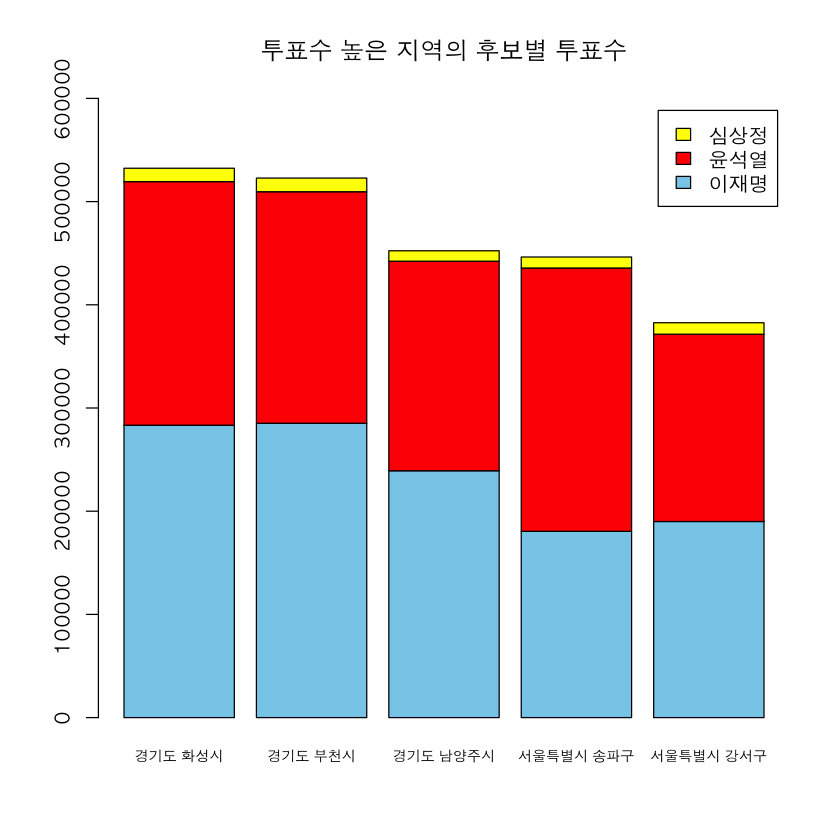

In [152]:
top5 <- as.matrix(head(arrange(election, desc(투표수)), 5)[2,c(5:7)])
name <- head(arrange(election, desc(투표수)), 5)
rownames(top5) <- paste(name$광역시도, name$시군구)

par(family = "AppleGothic")

options(scipen = 100) # 지수 제거
barplot(
        t(top5),
        main = "투표수 높은 지역의 후보별 투표수",
        legend = T,
        ylim = c(0, 600000),
        col = c('skyblue', 'red', 'yellow'),
        cex.names = 0.7
)

In [167]:
vote80 <- arrange(election[election$투표율 >= 75,], desc(투표율))


광역시도,투표수,이재명,윤석열,심상정
강원도,651342,263042,356145,15615
경기도,5811705,2906228,2666377,138905
경상남도,1333167,441410,821971,31379
경상북도,1449581,333714,1054504,26217
광주광역시,985492,830058,124511,14865
대구광역시,1611512,345045,1199888,31131
대전광역시,802504,369395,393991,21842
부산광역시,1299128,480963,761853,28055
서울특별시,6302383,2841648,3169207,175079
세종특별자치시,231832,119349,101491,6780


In [185]:
table(election$투표수 / election$선거인수 * 100 > 75 )
table(election$투표수 / election$선거인수 * 100 > 75 & election$이재명 / election$투표수 * 100 > 50)
table(election$투표수 / election$선거인수 * 100 > 75 & election$윤석열 / election$투표수 * 100 > 50)

election$이투표율 <- election$이재명 / election$투표수 * 100
election$윤투표율 <- election$윤석열 / election$투표수 * 100

vote75 <- aggregate(cbind(투표율, 이투표율, 윤투표율) ~ 시군구, election, mean)
vote75 <- arrange(vote75[vote75$투표율 >= 75,], desc(투표율))
vote75

윤과반 <- vote75[vote75$윤투표율 >= 50, ]
nrow(윤과반)

이과반 <- vote75[vote75$이투표율 >= 50, ]
nrow(이과반)


FALSE  TRUE 
   56   192 


FALSE  TRUE 
  191    57 


FALSE  TRUE 
  142   106 

시군구,투표율,이투표율,윤투표율
과천시,84.88902,38.88253,57.080120
구례군,84.02284,84.34560,12.293540
장수군,83.78504,83.57363,12.711029
군위군,83.72659,13.76720,82.416799
진안군,83.54750,82.93291,13.640944
순창군,83.36059,85.41677,11.122290
담양군,83.05434,86.84454,9.918572
신안군,83.05046,87.57403,9.386232
임실군,82.92814,84.40943,12.045670
성남시분당구,82.92702,42.02496,54.584210


[1] 95

[1] 53

In [279]:
library(stringr)

election$투표율 <- election$투표수 / election$선거인수

vote75 <- subset(election, 투표율 >= 0.75)
head(vote75)



이재명 <- subset(election, 투표율 >= 0.75 & 이재명/투표수 > 0.5)
head(이재명)
leeCount <- count(이재명, 광역시도)
leeCount <- arrange(leeCount, desc(n))

윤석열 <- subset(election, 투표율 >= 0.75 & 윤석열/투표수 > 0.5)
yCount <- count(윤석열, 광역시도)
yCount <- arrange(yCount, desc(n))

leeCount
yCount

vote50 <- merge(x=yCount, y=leeCount, by.x="광역시도", by.y="광역시도", all.x = T, all.y = T)

vote50$n.x <- str_replace_na(as.character(vote50$n.x),0)
vote50$n.y <- str_replace_na(as.character(vote50$n.y),0)
colnames(vote50) <- c("광역시도", "윤석열", "이재명")
vote50 <- as.matrix(vote50)
t(vote50)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio,이투표율,윤투표율
서울특별시,종로구,129968,100629,46130,49172,3115,0.7742598,98417,97.80183,45.84166,48.86464
서울특별시,중구,111448,84998,38244,42906,2310,0.7626696,83460,98.19055,44.99400,50.47883
서울특별시,용산구,199077,152068,60063,85047,4374,0.7638652,149484,98.30076,39.49746,55.92695
서울특별시,성동구,252087,197240,84411,103880,5365,0.7824283,193656,98.18292,42.79609,52.66680
서울특별시,광진구,303582,235471,109922,113733,7072,0.7756422,230727,97.98531,46.68176,48.30022
서울특별시,동대문구,300928,232106,108171,112890,6416,0.7713008,227477,98.00565,46.60414,48.63726


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio,이투표율,윤투표율
12,서울특별시,은평구,417391,317971,161510,140666,9715,0.7618061,311891,98.08788,50.79394,44.23863
18,서울특별시,금천구,208786,157035,80208,69227,4278,0.7521338,153713,97.88455,51.07651,44.08380
60,광주광역시,동구,90678,73877,60669,11036,1063,0.8147180,72768,98.49886,82.12163,14.93834
61,광주광역시,서구,248147,202633,170357,26262,2961,0.8165845,199580,98.49334,84.07170,12.96038
62,광주광역시,남구,180643,148854,124572,19927,2073,0.8240231,146572,98.46695,83.68737,13.38694
63,광주광역시,북구,363088,295658,249976,36421,4550,0.8142874,290947,98.40660,84.54904,12.31862


광역시도,n
전라남도,22
전라북도,15
경기도,12
광주광역시,5
서울특별시,2
세종특별자치시,1


광역시도,n
경상북도,22
경상남도,18
강원도,14
대구광역시,8
부산광역시,8
서울특별시,8
충청남도,8
충청북도,7
경기도,6
울산광역시,3


광역시도,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,충청남도,충청북도
윤석열,14,6,18,22,0,8,1,8,8,0,3,3,0,0,8,7
이재명,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0


ERROR: Error in localWindow(xlim, ylim, log, asp, ...): formal argument "col" matched by multiple actual arguments


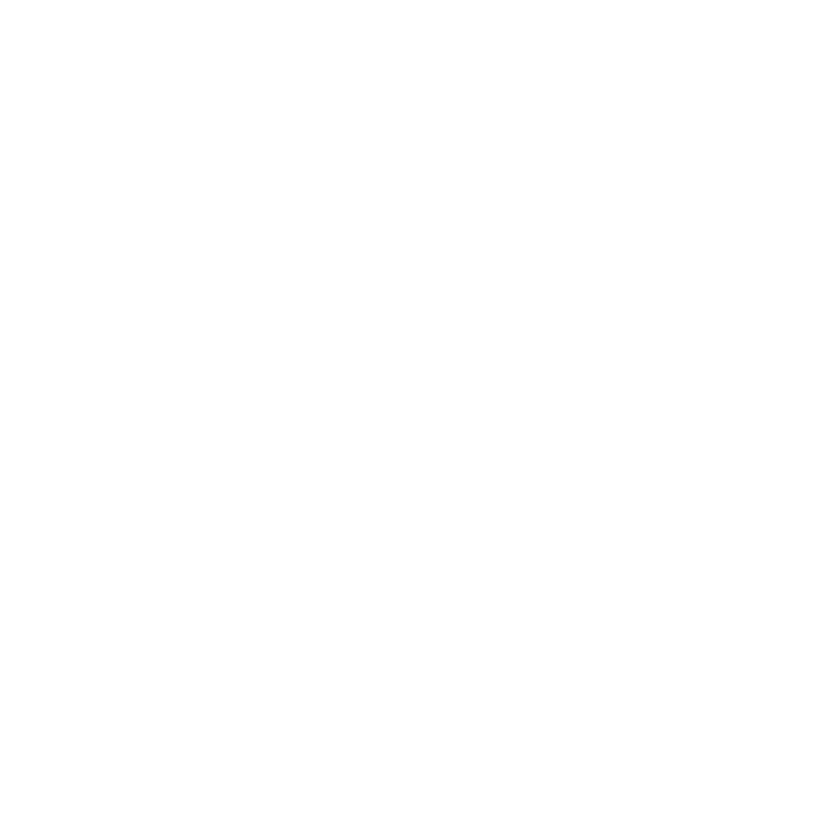

In [310]:
par(family = 'AppleGothic')
options(warn = -1)
plot(
    vote50[1,],
    type = "o",
    col = c('red','blue'),
    ylim = c(0, 25),
    col = 'black',
    axis = F,
    ann = F
)

# axis(1, at = 1:nrow(vote50), lab = vote50[,1])


In [370]:
library(dplyr)
ratio <-data.frame(광역시도=election$광역시도,시군구=election$시군구,투표율=election$투표수/election$선거인수*100,
이재명=election$이재명/election$투표수*100,
윤석열=election$윤석열/election$투표수*100,
심상정=election$심상정/election$투표수*100)
ratio <-arrange(ratio,desc(투표율))
head(ratio)
#지역별 75넘는곳
지역75<- subset(ratio,투표율>=75)
count(지역75,광역시도)

#이재명 50 넘는곳
이재명50<- subset(ratio,투표율>=75&이재명>50)
count(이재명50,광역시도)

#윤석열 50 넘는곳
윤석열50 <- subset(ratio,투표율>=75&윤석열>50)
count(윤석열50,광역시도)

merge1 <-merge(x=count(지역75,광역시도),y=count(이재명50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
                                                                            # x가 많은 기준
merge2<-merge(x=merge1,y=count(윤석열50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
colnames(merge2) <- c('광역시도','지역별75','이재명50','윤석열50')
merge2[is.na(merge2)] <-0 # NA인 부분을 0으로 바꿔줌
merge2

광역시도,시군구,투표율,이재명,윤석열,심상정
경기도,과천시,84.88902,38.88253,57.08012,2.424623
전라남도,구례군,84.02284,84.34560,12.29354,1.212628
전라북도,장수군,83.78504,83.57363,12.71103,1.367837
경상북도,군위군,83.72659,13.76720,82.41680,1.184275
전라북도,진안군,83.54750,82.93291,13.64094,1.400159
전라북도,순창군,83.36059,85.41677,11.12229,1.157000


광역시도,n
강원도,14
경기도,26
경상남도,18
경상북도,22
광주광역시,5
대구광역시,8
대전광역시,4
부산광역시,8
서울특별시,24
세종특별자치시,1


광역시도,n
경기도,12
광주광역시,5
서울특별시,2
세종특별자치시,1
전라남도,22
전라북도,15


광역시도,n
강원도,14
경기도,6
경상남도,18
경상북도,22
대구광역시,8
대전광역시,1
부산광역시,8
서울특별시,8
울산광역시,3
인천광역시,3


광역시도,지역별75,이재명50,윤석열50
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


In [312]:
team<- t(as.matrix(merge2[,2:4]))
team

지역별75,14,26,18,22,5,8,4,8,24,1,5,4,22,15,8,8
이재명50,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0
윤석열50,14,6,18,22,0,8,1,8,8,0,3,3,0,0,8,7


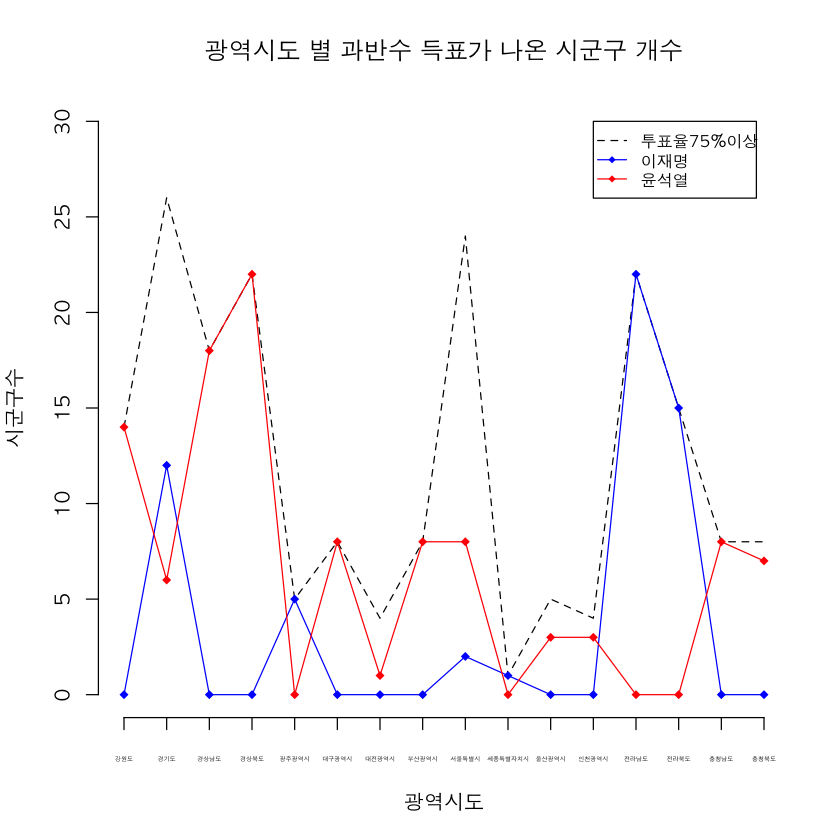

In [318]:
par(family ="AppleGothic", bg='white')
options(warn = -1)
plot(team[1,],
    type='l',
     ylim=c(0,30),
     col='black',
     axes =F, #x,y 좌표 frame 제거
     ann=F, #x,y label 제거
     lty = 2,
    
    )
# x축과 x축의 라벨을 설정
axis(1, at=1:16, lab=merge2$광역시도,cex.axis=0.3)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")
lines(team[2,],
      type='o',
       pch=18,
      lty=1,
     col="blue")

lines(team[3,],
      type='o',
       pch=18,
      lty=1,
     col="red")
# 범례
legend(12,30, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8  #기본 값이 1 
      )

In [368]:
# 투표율 최고, 최저 지역의 득표율
head(election)

vote <- aggregate(cbind(선거인수, 투표수, 이재명, 윤석열, 심상정) ~ 광역시도, election, sum)
vote$투표율 <- vote$투표수 / vote$선거인수 * 100

maxVote <- arrange(vote, desc(투표율))[1,c(1,3:6)]
minVote <- arrange(vote, 투표율)[1,c(1,3:6)]

votee <- data.frame(t(maxVote), t(minVote))
t(votee)


par(family ="AppleGothic")
barplot(결과[c(4,3,2,1),],
main="투표율 최고,최저 지역의 득표율",

xlab="후보별 득표율 (%)",
ylab="투표율 = 지역별 투표수/선거인수",
beside=T,
horiz=T,  #막대그래프 가로로 나오게 하기 
xlim=c(0,100),
col=c("grey","yellow","red","skyblue"),
legend.text = T
)
        

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,electionSum,electionRatio,이투표율,윤투표율
서울특별시,종로구,129968,100629,46130,49172,3115,0.7742598,98417,97.80183,45.84166,48.86464
서울특별시,중구,111448,84998,38244,42906,2310,0.7626696,83460,98.19055,44.99400,50.47883
서울특별시,용산구,199077,152068,60063,85047,4374,0.7638652,149484,98.30076,39.49746,55.92695
서울특별시,성동구,252087,197240,84411,103880,5365,0.7824283,193656,98.18292,42.79609,52.66680
서울특별시,광진구,303582,235471,109922,113733,7072,0.7756422,230727,97.98531,46.68176,48.30022
서울특별시,동대문구,300928,232106,108171,112890,6416,0.7713008,227477,98.00565,46.60414,48.63726


,광역시도,투표수,이재명,윤석열,심상정
X1,광주광역시,985492,830058,124511,14865
X1.1,제주특별자치도,409649,213130,173014,13598


ERROR: Error in barplot(결과[c(4, 3, 2, 1), ], main = "투표율 최고,최저 지역의 득표율", : 객체 '결과'를 찾을 수 없습니다


In [373]:
광역시 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum)
election$투표율 <- election$투표수 / election$선거인수
이재명 <- subset(election, 투표율>=0.75 & 이재명/투표수 > 0.5)
윤석열 <- subset(election, 투표율>=0.75 & 윤석열/투표수 > 0.5)
투표율 <- subset(election, 투표율>=0.75)

차트 <- data.frame(cbind(table(이재명$광역시도), table(윤석열$광역시도), table(투표율$광역시도)))
colnames(차트) <- c('이재명', '윤석열', '투표율')
차트$합계 <- 차트$이재명 + 차트$윤석열 + 차트$투표율
차트 <- t(차트)

,이재명,윤석열,투표율,합계
강원도,0,14,14,28
경기도,12,6,26,44
경상남도,0,18,18,36
경상북도,0,22,22,44
광주광역시,5,0,5,10
대구광역시,0,8,8,16
대전광역시,0,1,4,5
부산광역시,0,8,8,16
서울특별시,2,8,24,34
세종특별자치시,1,0,1,2


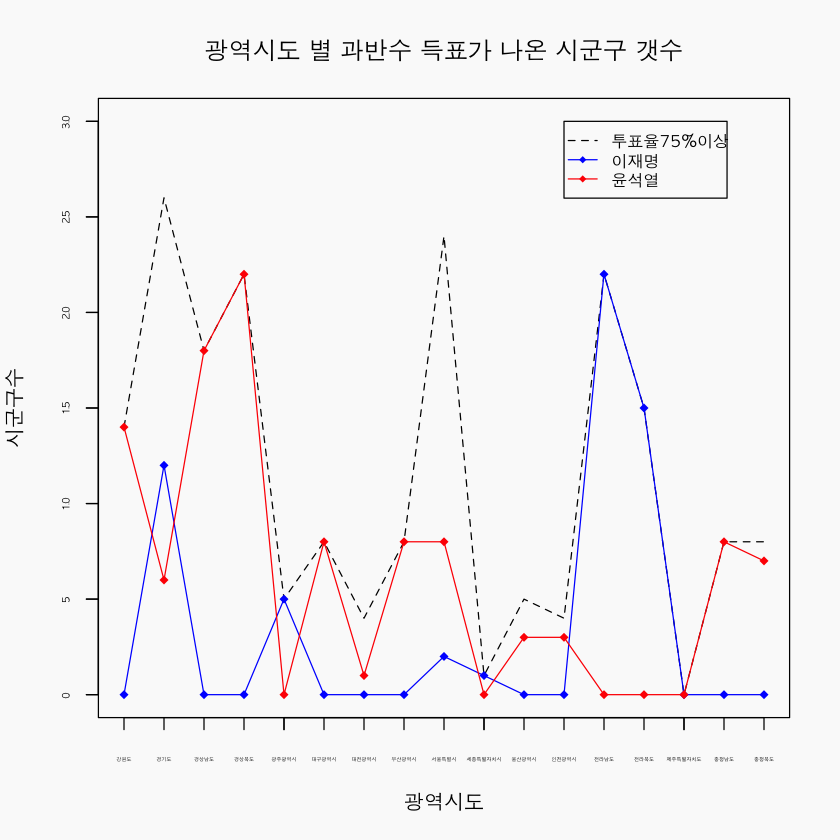

In [374]:
par(family = 'AppleGothic', bg = '#fafafa')

election$투표율 <- election$투표수 / election$선거인수
이재명 <- subset(election, 투표율>=0.75 & 이재명/투표수 > 0.5)
윤석열 <- subset(election, 투표율>=0.75 & 윤석열/투표수 > 0.5)
투표율 <- subset(election, 투표율>=0.75)

차트 <- data.frame(cbind(table(이재명$광역시도), table(윤석열$광역시도), table(투표율$광역시도)))
colnames(차트) <- c('이재명', '윤석열', '투표율')
차트$합계 <- 차트$이재명 + 차트$윤석열 + 차트$투표율
차트

plot(
    c(차트[,3]),
    main='광역시도 별 과반수 득표가 나온 시군구 갯수',
    type='l',
    ylab='시군구수',
    xlab='광역시도',
    cex.axis = 0.1,
    ylim=c(0,30),
    lty = 2
)
axis(1,at=1:17, lab=colnames(t(차트)), cex.axis=0.25)
axis(2, cex.axis=0.5)

lines(
    c(차트[,1]),
    col='blue',
    type='o',
    pch=18,
    lty=1,
)
lines(
    c(차트[,2]),
    col='red',
    type='o',
    pch=18,
    lty=1,
)
legend(12,30, 
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8 
    )

In [391]:
par(family = 'AppleGothic', bg = '#fafafa')
광<- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum)
광$권역 <- c('강원권', '수도권', '영남권', '영남권', '호남권', '영남권', '충청권', '영남권', '수도권', '충청권', '영남권', '수도권', '호남권', '호남권','호남권','충청권','충청권')
광 <- aggregate(cbind(투표수, 이재명, 윤석열, 심상정)~권역, 광, sum)
광


권역,투표수,이재명,윤석열,심상정
강원권,1015458,419644,544980,25031
수도권,16904189,8156232,7993973,433289
영남권,8468363,2686576,5382549,185678
충청권,3464133,1573443,1719055,89261
호남권,3912521,3154923,619883,64193


# 각 시군구별 실제 투표율과 가장 유사한 지역 Top 5를 뽑아서 오차의 합을 막대 그래프로 그려라

 - 조건 1: 각 후보별 순위 변동 없음
 - 각 후보별 오차 1프로 이내
 - 조건 3: 오차의 합이 최소인 지역 순서대로 정렬
 - 실제 득표율 : 이재명 47.83, 윤석열, 48.56, 심상정 2.37

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,이,윤,심,오차합
대전광역시,유성구,288686,231027,0.7787895,0.3656331,0.4400612,47.05121,48.19437,2.810061,1.584484
인천광역시,미추홀구,356862,253347,0.7455664,0.7512634,0.3736678,47.08443,47.80874,2.743668,1.870498
인천광역시,동구,53909,40918,0.9191050,0.5102419,0.5529190,46.91089,48.04976,2.922919,1.982266
대전광역시,대덕구,152905,115404,0.9347451,0.7635631,0.3517427,46.89525,47.79644,2.721743,2.050051
충청북도,청주시흥덕구,223335,163683,0.8245077,0.9362394,0.5441695,47.00549,47.62376,2.914169,2.304917


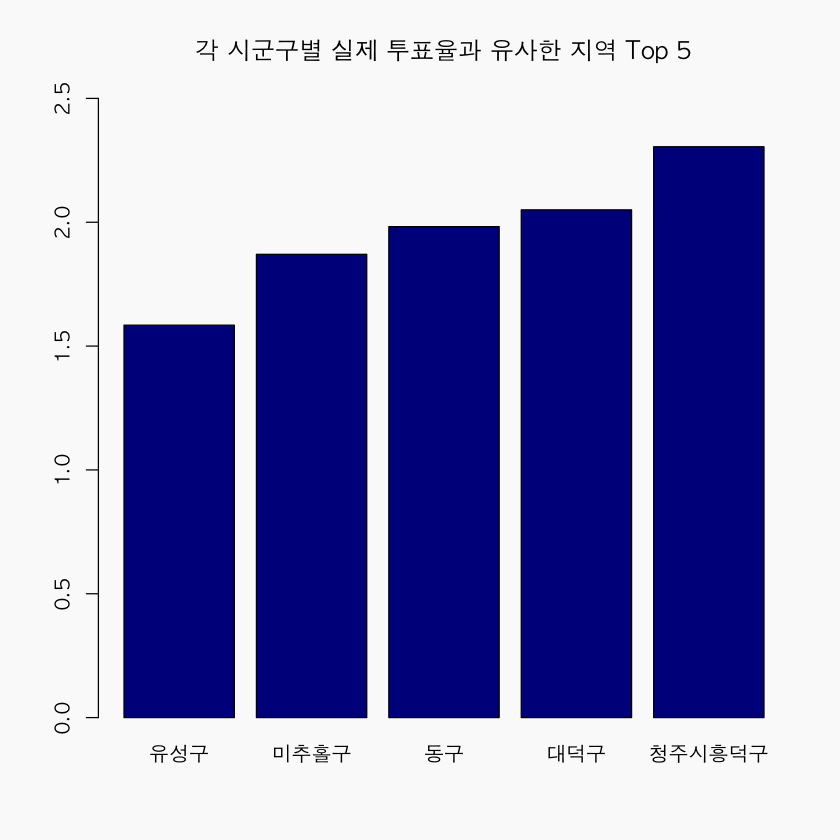

In [409]:
head(election)

election$심투표율 <- election$심상정 / election$투표수 * 100

election$재명오차 <-  abs(47.83-election$이투표율)
election$석열오차 <-  abs(48.56-election$윤투표율)
election$상정오차 <-  abs(2.37-election$심투표율)


election <- subset(election, 재명오차<=1 & 석열오차<=1 &심상정<=1 & 이 < 윤)
election$오차합 <- election$이재명 + election$윤석열 + election$심상정
election <-


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,이,윤,심,오차합
대전광역시,유성구,288686,231027,0.7787895,0.3656331,0.4400612,47.05121,48.19437,2.810061,1.584484
인천광역시,미추홀구,356862,253347,0.7455664,0.7512634,0.3736678,47.08443,47.80874,2.743668,1.870498
인천광역시,동구,53909,40918,0.9191050,0.5102419,0.5529190,46.91089,48.04976,2.922919,1.982266
대전광역시,대덕구,152905,115404,0.9347451,0.7635631,0.3517427,46.89525,47.79644,2.721743,2.050051
충청북도,청주시흥덕구,223335,163683,0.8245077,0.9362394,0.5441695,47.00549,47.62376,2.914169,2.304917


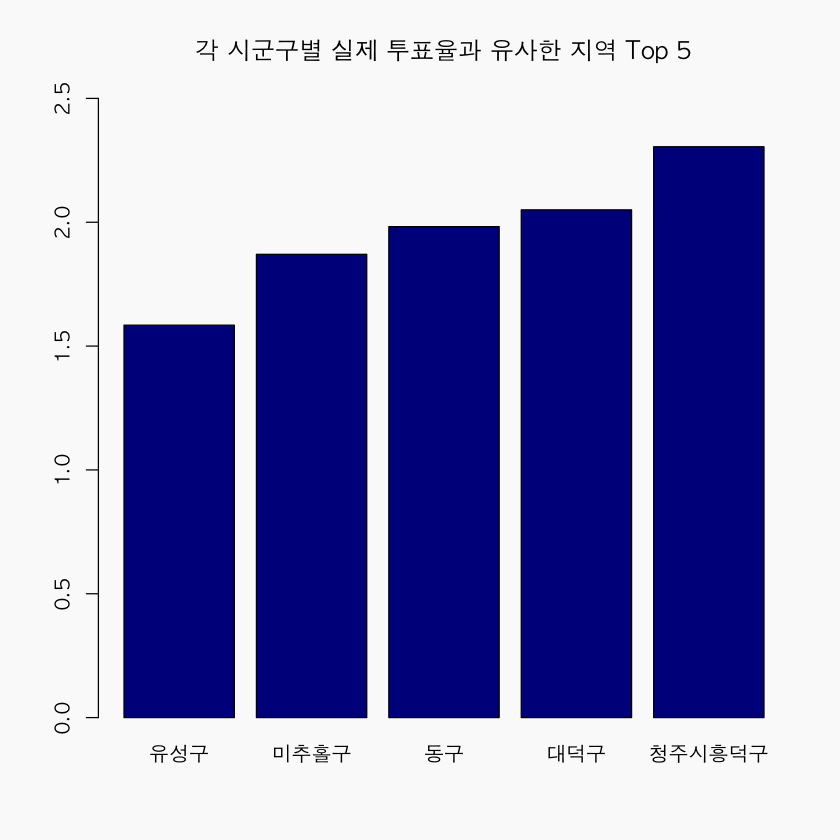

In [410]:
par(family = 'AppleGothic', bg = '#fafafa')
election <- read.csv('../Data/election_2022.csv')
# 각 후보 투표율
election$이 <- (election$이재명 / election$투표수) * 100
election$윤 <- (election$윤석열 / election$투표수) * 100
election$심 <- (election$심상정 / election$투표수) * 100

# 각 후보들의 전체 투표율과의 오차
election$이재명 <- abs(election$이 - 47.83)
election$윤석열 <- abs(election$윤 - 48.56)
election$심상정 <- abs(election$심 - 2.37)


election <- subset(election, 이재명<=1 & 윤석열<=1 &심상정<=1 & 이 < 윤)
election$오차합 <- election$이재명 + election$윤석열 + election$심상정
election <- arrange(election, 오차합)

election

name <- election[,2]

barplot(
    election[1:5, 11],
    ylim = c(0,2.5),
    names = name,
    main = '각 시군구별 실제 투표율과 유사한 지역 Top 5',
    col = 'darkblue'
)